##**Lesson: Classification of Character Gender Based on Movie Dialogues**

##**Dataset Description**
In this lesson we wiill build a classification model to classify the gender of a Hollywood movie character based on their dialogues in the movie.

This dataset is a rich collection of fictional conversations extracted from raw movie scripts. The dataset has:

*   2,20,579 conversational exchanges between 10,292 pairs of movie characters
*   Involves 9,035 characters from 617 movies
*   In total 3,04,713 utterances

**Link to movie characters metadata file:** https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_characters_metadata.tsv 

The movie characters metadata file has following fields about each movie character:
* characterID
* character name
* movieID
* movie title
* gender with "?" for unlabeled cases
* position in credits with "?" for unlabeled cases


**Link to movie lines file:** https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_lines.tsv

The movie lines dataset contains the actual text of each utterance or the dialogues of the characters. The fields included are:
* lineID
* characterID (who uttered this phrase)
* movieID
* character name
* text of the utterance



**Note:** The files have an extension .tsv which stands for tab seperated value. This means the columns in the dataset are seperated by tab ('\t') character

##Activity 1: Load the datasets

In [ ]:
# Import the required python libraries
import pandas as pd
import string
import warnings
warnings.filterwarnings(action = 'ignore')

In the above cell we have imported the required python modules using `import` keyword. 

In [ ]:
# Create a pandas dataframe
movie_char_df = pd.read_csv("https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_characters_metadata.tsv")

# Display the first 5 rows 
movie_char_df.head()

,u0\tBIANCA\tm0\t10 things i hate about you\tf\t4
0,u1\tBRUCE\tm0\t10 things i hate about you\t?\t?
1,u2\tCAMERON\tm0\t10 things i hate about you\tm\t3
2,u3\tCHASTITY\tm0\t10 things i hate about you\t...
3,u4\tJOEY\tm0\t10 things i hate about you\tm\t6
4,u5\tKAT\tm0\t10 things i hate about you\tf\t2


We can see that the column name is inferred from the first row from the dataset. 

To avoid first line acting as the column header pass `header = None` in `read_csv()`

In [ ]:
# Pass header in read_csv()
movie_char_df = pd.read_csv("https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_characters_metadata.tsv", header = None)

# Display the first 5 rows 
movie_char_df.head()

,0
0,u0\tBIANCA\tm0\t10 things i hate about you\tf\t4
1,u1\tBRUCE\tm0\t10 things i hate about you\t?\t?
2,u2\tCAMERON\tm0\t10 things i hate about you\tm\t3
3,u3\tCHASTITY\tm0\t10 things i hate about you\t...
4,u4\tJOEY\tm0\t10 things i hate about you\tm\t6


Now set the delimeter as `sep = '\t'` in `read_csv()` to seperate the columns at `'\t'` character.

In [ ]:
# Pass sep in read_csv(). This code will give us an error.
# movie_char_df = pd.read_csv("https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_characters_metadata.tsv", 
#                               header = None, sep = '\t')

The above code when run gives an error stating in line 6565 there are 13 tabs agaist 6 tabs in each row. Let us display rows 6563 to 6566 to understand what this means.

In [ ]:
# Display rows from 6563 to 6566
movie_char_df.iloc[6563:6566,:]

,0
6563,u6563\tLEONARD\tm436\tmemento\tm\t1
6564,u6564\tLEONARD\t\t\t\t\t\t\t *\tm436\tmemento...
6565,u6565\tLEONARD'S WIFE\tm436\tmemento\t?\t?


To resolve this error set `error_bad_lines = False` and `warn_bad_lines= True` in `read_csv()`

`error_bad_lines`: Lines with too many fields will cause an exception to be raised, hence `read_csv()` will not return any dataframe. If this parameter is set to False, then all the “bad lines” with too many fields will be dropped from the DataFrame that is returned.

`warn_bad_lines`: If error_bad_lines is set to False, and warn_bad_lines is True, a warning for each “bad line” will be output. This indicates which of the bad lines are skipped while loading the file using `read_csv()`.


In [ ]:
# Skip the bad lines with too many fields
movie_char_df = pd.read_csv("https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_characters_metadata.tsv", 
                              header = None, sep = '\t', error_bad_lines = False, warn_bad_lines= True)

b'Skipping line 6565: expected 6 fields, saw 13\n'


In the above cell the result of `warn_bad_lines= True` is displyed. It can be seen that line 6565 has 13 fields instead of 6 expected fields. 

with `error_bad_lines = False` the row with index 6564 which is the 6565th row will be skipped in dataframe returned.

In [ ]:
# Display rows from 6563 to 6566
movie_char_df.iloc[6563:6566,:]

,0,1,2,3,4,5
6563,u6563,LEONARD,m436,memento,m,1
6564,u6565,LEONARD'S WIFE,m436,memento,?,?
6565,u6566,MRS. JANKIS,m436,memento,?,?


In [ ]:
# Diplay the first 5 rows in movie_char_df
movie_char_df.head()

,0,1,2,3,4,5
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


Next create a new dataframe for the movie conversations.

In [ ]:
# Create a pandas dataframe
movie_lines_df = pd.read_csv("https://raw.githubusercontent.com/rekhabu/movie_dialog/main/movie_lines.tsv", header = None, 
                             sep = '\t', error_bad_lines = False, warn_bad_lines = False)
# Display the first 5 rows 
movie_lines_df.head()

,0,1,2,3,4
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


##Activity 2: Data Exploration - Rename the columns
Before we go ahead let us rename the columns for both the dataframes with appropiate field names provided in description.

**Syntax:** `dataframe.rename(columns = {old_col_name_1:new_col_name_1, old_col_name_2: new_col_name_2}, inplace = True)`  

*   To columns we are assigning a dictionary with old column name as keys and new column name as values. 
*   With `inplace = True`, the same dataframe on which `rename()` is applied will be updated with new column names. If `inplace = False`, then we will have to reassign the dataframe to a variable after renaming.



In [ ]:
# To rename Movie Characters dataframe columns
# Create a dictionary with old and new column names as key-value pairs
col_names = {0:'CharacterID', 1:'CharacterName', 2:'MovieID', 3:'MovieTitle', 4: 'Gender', 5: 'PositionInCredits'}

# Rename the column headers
movie_char_df.rename(columns = col_names, inplace = True)

# Display the first 5 rows 
movie_char_df.head()

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In the above cell:
1. We first created a dictionary with old and new column names as key - value pairs for `movie_char_df` dataframe.
2. Then we applied the `rename()` on `movie_char_df` to rename the columns headers.
3. Next we have displayed the first five rows to verify that the column names are updated with new names.

In [ ]:
# Display the information 
movie_char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CharacterID        9034 non-null   object
 1   CharacterName      9015 non-null   object
 2   MovieID            9017 non-null   object
 3   MovieTitle         9017 non-null   object
 4   Gender             9017 non-null   object
 5   PositionInCredits  9017 non-null   object
dtypes: object(6)
memory usage: 423.6+ KB


`info()` provides a brief summary of the dataframe. This method prints information about a dataframe including the number of rows and columns, range of row indices, count of non-null values in each column, column data types and memory usage. 

The movie characters datframe has 9034 rows and 6 columns. All the columns are of string datatype. 

Let us now rename the movie lines dataframe. 

In [ ]:
# To rename Movie Lines dataframe columns
# Create a dictionary with old and new column names as key-value pairs
col_names = {0:'LineID', 1:'CharacterID', 2:'MovieID', 3:'CharacterName', 4: 'Speech'}

# Rename the columns
movie_lines_df.rename(columns = col_names, inplace = True)

# Display the first 5 rows
movie_lines_df.head()

,LineID,CharacterID,MovieID,CharacterName,Speech
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [ ]:
# Display the information
movie_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293202 entries, 0 to 293201
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   LineID         293202 non-null  object
 1   CharacterID    288917 non-null  object
 2   MovieID        288917 non-null  object
 3   CharacterName  288874 non-null  object
 4   Speech         288663 non-null  object
dtypes: object(5)
memory usage: 11.2+ MB


##Activity 3: Data Cleaning - Treating the Missing values

We will now check if the dataframes have any missing values. For this we use `isnull()`. The fuction returns True if a value is missing in a given column else it returns a False. The missing values are usually represented as `NaN` or `NA`

In [ ]:
# Check whether movie_char_df dataframe has missing values or not
movie_char_df.isnull()

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9029,False,False,False,False,False,False
9030,False,False,False,False,False,False
9031,False,False,False,False,False,False
9032,False,False,False,False,False,False


To find the total number of missing values in each column apply `sum()` on `isnull()`.

In [ ]:
# Find the number of missing values in each and column using sum() 
print(movie_char_df.isnull().sum())

# Leave an empty line
print()

# Find the percentage of missing values in each column
print((movie_char_df.isnull().sum()/movie_char_df.shape[0])*100)

CharacterID           0
CharacterName        19
MovieID              17
MovieTitle           17
Gender               17
PositionInCredits    17
dtype: int64

CharacterID          0.000000
CharacterName        0.210317
MovieID              0.188178
MovieTitle           0.188178
Gender               0.188178
PositionInCredits    0.188178
dtype: float64


We can see, approximately only 0.2% of the total 9034 values are missing. These rows can be dropped without having any effect on the dataset.

In [ ]:
# Identify the rows where CharacterName is mssing
missing_rows_char_name = movie_char_df[movie_char_df['CharacterName'].isnull() == True]
missing_rows_char_name

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits
1602,"u1602\t""DOCTOR""\tm106\tjacob's ladder\t?\t?",NaN,NaN,NaN,NaN,NaN
1866,"u1866\t""V""\tm123\tlost highway\t?\t?",NaN,NaN,NaN,NaN,NaN
3764,u3764,NaN,m248,arctic blue,?,?
4660,"u4660\tJOEY ""TWO TONS""\tm309\tcrime spree\t?\t?",NaN,NaN,NaN,NaN,NaN
4664,"u4664\tNICKY ""THE RAKE""\tm309\tcrime spree\t?\t?",NaN,NaN,NaN,NaN,NaN
5011,"u5011\t""BRILL""\tm333\tenemy of the state\t?\t?",NaN,NaN,NaN,NaN,NaN
6558,u6558,NaN,m436,memento,?,?
6735,"u6736\tANNOUNCER\tm449\t""murderland""\t?\t?",NaN,NaN,NaN,NaN,NaN
6736,"u6737\tBRUCE\tm449\t""murderland""\tM\t?",NaN,NaN,NaN,NaN,NaN
6737,"u6738\tFRED THOMISON\tm449\t""murderland""\t?\t?",NaN,NaN,NaN,NaN,NaN


We may notice in the above dataframe, in all the rows where CharacterName is NaN, MovieID, MovieTitle, 	Gender and PositionInCredits are also not available. Hence dropping all the rows with missing CharacterName will eliminate even the other column rows which have missing values. 

**Syntax:** To drop the rows.
```
dataframe.drop(labels = row_indexes_to_drop, axis = 0, inplace = True)
or
dataframe.drop(index = row_indexes_to_drop, inplace = True)
```



In [ ]:
# Drop the rows where CharacterName is not available
movie_char_df.drop(labels = missing_rows_char_name.index, axis = 0, inplace = True)

# Find the new shape after dropping
print(movie_char_df.shape)

(9015, 6)


In the above cell, `missing_rows_char_name.index` will return a list of row indices which we dropped for the `missing_rows_char_name` dataframe.

In [ ]:
# Check if movie_char_df datafrmae has any other missing values.
movie_char_df.isnull().sum()

CharacterID          0
CharacterName        0
MovieID              0
MovieTitle           0
Gender               0
PositionInCredits    0
dtype: int64

In [ ]:
# Find the counts of male and female in Gender column of movie_char_df
movie_char_df['Gender'].value_counts()

?    6006
m    1899
f     921
M     145
F      44
Name: Gender, dtype: int64

As we can see, there are 6006 rows out of 9015 with unlabelled gender denoted by `'?'`. These do not contribute in classification. As they are more than 65% of values it is not wise to replace them as well. Hence all these rows can be dropped.

Next find all the rows where `Gender` column has `'?'` value.

In [ ]:
# Create a dataframe with `Gender` column having '?'
missing_rows_gender = movie_char_df[movie_char_df['Gender'] == '?']

# Print the indices of the above dataframe
missing_rows_gender_list = missing_rows_gender.index

In [ ]:
# Use drop() to drop all the rows with indices in missing_rows_gender_list 
movie_char_df.drop(labels = missing_rows_gender_list, axis = 0, inplace = True)

# Check the shape of dataframe after dropping
print(movie_char_df.shape,'\n')

# Find the count of male and female
movie_char_df['Gender'].value_counts()

(3009, 6) 



m    1899
f     921
M     145
F      44
Name: Gender, dtype: int64

In [ ]:
# Find the total number of male and female characters
print("Total male characters =", 1899 + 145)
print("Total female characters =", 921 + 44)

Total male characters = 2044
Total female characters = 965


The `Gender is the target for the classification model. Currently male is represented by characters 'm' and 'M' and female by 'f' and 'F'.

The targets must be numerical values or of numerical datatype. So, let us now encode the gender male as 1 and female as 0.

In [ ]:
# Replace Male with 1 and Female with 0
gender_list = []
for item in movie_char_df['Gender']:
  if (item == 'm') or (item == 'M'):
    gender_list.append(1)
  elif (item == 'f') or (item == 'F'):
    gender_list.append(0)

# Drop gender column from movie_char_df
movie_char_df.drop(columns = 'Gender', inplace = True)
gender_ser = pd.Series(data = gender_list, index = movie_char_df.index)

# Insert the new gender column with Male encoded as 1 and Female encoded as 0 into movie_char_df
movie_char_df.insert(loc = 4, column = 'Gender', value = gender_ser) 
movie_char_df

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits
0,u0,BIANCA,m0,10 things i hate about you,0,4
2,u2,CAMERON,m0,10 things i hate about you,1,3
4,u4,JOEY,m0,10 things i hate about you,1,6
5,u5,KAT,m0,10 things i hate about you,0,2
6,u6,MANDELLA,m0,10 things i hate about you,0,7
...,...,...,...,...,...,...
9014,u9015,ELIZABETH,m615,young frankenstein,0,25
9016,u9017,FREDDY,m615,young frankenstein,1,?
9018,u9019,IGOR,m615,young frankenstein,1,3
9019,u9020,INGA,m615,young frankenstein,0,5


In the above cell we perform the following actions.
1. Create an empty list to store the encoded gender values. 
2. Encode all male ('m' and 'M') and female ('f' and 'F') gender values as 1 and 0 respectively.
3. Drop the original existing gender feature from movie_char_df dataframe using drop()
4. Insert the encoded Gender column consisting of 1s and 0s into movie_char_df dataframe.

In [ ]:
# Check the count of Male and Female after encoding
movie_char_df['Gender'].value_counts()

1    2044
0     965
Name: Gender, dtype: int64

The count is maintaineda as above.

In [ ]:
# Display the information of movie_char_df dataframe
movie_char_df.info()
# The gender column is now in int datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 9021
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CharacterID        3009 non-null   object
 1   CharacterName      3009 non-null   object
 2   MovieID            3009 non-null   object
 3   MovieTitle         3009 non-null   object
 4   Gender             3009 non-null   int64 
 5   PositionInCredits  3009 non-null   object
dtypes: int64(1), object(5)
memory usage: 164.6+ KB


We are now about to explore `CharacterID, CharacterName, MovieID, and PositionInCredits` features, to understand how well they can help in classification.

In [ ]:
# Find the unique items and thier count in CharacterID
print(f"Unique characterIDs =\n{movie_char_df['CharacterID'].unique()}")
print(f"\nNumber of unique characterIDs = {len(movie_char_df['CharacterID'].unique())}")

Unique characterIDs =
['u0' 'u2' 'u4' ... 'u9019' 'u9020' 'u9022']

Number of unique characterIDs = 3009


In [ ]:
# Find the unique items and thier count in CharacterName
print(f"Unique character names =\n{movie_char_df['CharacterName'].unique()}")
print(f"\nNumber of unique character names = {len(movie_char_df['CharacterName'].unique())}")

Unique character names =
['BIANCA' 'CAMERON' 'JOEY' ... 'IGOR' 'INGA' 'MEDICAL STUDENT']

Number of unique character names = 1949


In [ ]:
# Find the unique items and thier count in MovieID
print(f"Unique movieIDs =\n{movie_char_df['MovieID'].unique()}")
print(f"\nNumber of unique movieIDs = {len(movie_char_df['MovieID'].unique())}")

Unique movieIDs =
['m0' 'm1' 'm2' 'm3' 'm4' 'm5' 'm6' 'm7' 'm8' 'm9' 'm10' 'm11' 'm12' 'm13'
 'm14' 'm15' 'm16' 'm17' 'm18' 'm19' 'm20' 'm21' 'm22' 'm23' 'm24' 'm25'
 'm26' 'm27' 'm28' 'm29' 'm30' 'm31' 'm32' 'm33' 'm34' 'm35' 'm36' 'm37'
 'm38' 'm39' 'm40' 'm41' 'm42' 'm43' 'm44' 'm45' 'm46' 'm47' 'm48' 'm49'
 'm50' 'm51' 'm52' 'm53' 'm54' 'm55' 'm56' 'm57' 'm58' 'm59' 'm60' 'm61'
 'm62' 'm63' 'm64' 'm65' 'm66' 'm67' 'm68' 'm69' 'm70' 'm71' 'm72' 'm73'
 'm74' 'm75' 'm76' 'm77' 'm78' 'm79' 'm80' 'm81' 'm82' 'm83' 'm84' 'm85'
 'm86' 'm87' 'm88' 'm89' 'm90' 'm91' 'm92' 'm93' 'm94' 'm95' 'm96' 'm97'
 'm98' 'm99' 'm100' 'm101' 'm102' 'm103' 'm104' 'm105' 'm106' 'm107'
 'm108' 'm109' 'm110' 'm111' 'm112' 'm113' 'm114' 'm115' 'm116' 'm117'
 'm118' 'm119' 'm120' 'm121' 'm122' 'm123' 'm124' 'm125' 'm126' 'm127'
 'm128' 'm129' 'm130' 'm131' 'm132' 'm133' 'm134' 'm136' 'm137' 'm138'
 'm139' 'm140' 'm141' 'm142' 'm143' 'm144' 'm145' 'm146' 'm147' 'm148'
 'm149' 'm150' 'm151' 'm152' 'm153' 'm154' 

In [ ]:
# Find the unique items and thier count in PositionInCredits
print(f"Unique position in credits =\n{movie_char_df['PositionInCredits'].unique()}")
print(f"\nNumber of unique position in credits = {len(movie_char_df['PositionInCredits'].unique())}")

Unique position in credits =
['4' '3' '6' '2' '7' '5' '1' '9' '?' '8' '11' '21' '13' '22' '16' '1000'
 '12' '10' '14' '39' '24' '15' '17' '19' '18' '28' '38' '31' '25' '45'
 '29' '42' '63' '59' '33' '43' '36' '27' '26' '20' '44' '49' '34' '23'
 '32' '37' '30' '50' '82' '51' '46' '62' '47' '35' '41' '71' '70']

Number of unique position in credits = 57


From the above results it is clear that only `Character IDs` are unique to each sample. i.e. for each of the 3009 entries in `movie_char_df` dataframe there are 3009 unique character IDs. 

Next is to explore movie lines dataframe.

In [ ]:
# Display the shape and first 5 rows of movie_lines_df dataframe
print(movie_lines_df.shape)
movie_lines_df.head()

(293202, 5)


,LineID,CharacterID,MovieID,CharacterName,Speech
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [ ]:
# Check for the percentage of missing values in movie_lines_df
print(movie_lines_df.isnull().sum())
print()
print((movie_lines_df.isnull().sum()/movie_lines_df.shape[0])*100)

LineID              0
CharacterID      4285
MovieID          4285
CharacterName    4328
Speech           4539
dtype: int64

LineID           0.000000
CharacterID      1.461450
MovieID          1.461450
CharacterName    1.476115
Speech           1.548079
dtype: float64


The Speech column has highest missing values. It could be possible that in all the rows where `Speech` is unavailable, C`haracterID, MovieID, and CharacterName` also could be missing.

In [ ]:
# Check if 'CharacterID', 'MovieID', and 'CharacterName' are also missing in all those rows where 'Speech' is also missing
for col in ['CharacterID', 'MovieID', 'CharacterName']:
  print(movie_lines_df[(movie_lines_df['Speech'].isnull() == True) & (movie_lines_df[col].isnull() == True)].shape)

(4285, 5)
(4285, 5)
(4285, 5)


It can be seen that in all the rows where `'Speech'` is missing `'CharacterID', 'MovieID', 'CharacterName'` are also not found. Hence these 4285 which are less than 2% of total samples can be dropped along with other rows where `'Speech'` alone is unspecified.

In [ ]:
# Identify the rows where 'Speech' is null.
missing_rows_dialogue = movie_lines_df[movie_lines_df['Speech'].isnull() == True]

# Display the first 5 rows
missing_rows_dialogue.head()

,LineID,CharacterID,MovieID,CharacterName,Speech
8,L870\tu0\tm0\tBIANCA\tI'm kidding. You know h...,NaN,NaN,NaN,NaN
10,"L868\tu2\tm0\tCAMERON\tThe ""real you"".",NaN,NaN,NaN,NaN
18,"L860\tu0\tm0\tBIANCA\tThen Guillermo says ""If ...",NaN,NaN,NaN,NaN
25,L693\tu2\tm0\tCAMERON\tI looked for you back a...,NaN,NaN,NaN,NaN
96,L589\tu4\tm0\tJOEY\tSo yeah I've got the Sears...,NaN,NaN,NaN,NaN


In [ ]:
# Drop all the rows from movie_lines_df dataframe with Speech missing
movie_lines_df.drop(labels = missing_rows_dialogue.index, axis = 0, inplace = True)

# Check for null values again
print(movie_lines_df.isnull().sum())

LineID            0
CharacterID       0
MovieID           0
CharacterName    43
Speech            0
dtype: int64


Still there are 43 rows with character names unknown. These rows can as well be dropped.

In [ ]:
# Find the rows in movie_lines_df dataframe where caharcter name is null
missing_rows_char_names = movie_lines_df[movie_lines_df['CharacterName'].isnull() == True]
missing_rows_char_names

,LineID,CharacterID,MovieID,CharacterName,Speech
124580,L50228,u3764,m248,NaN,215 CONTINUED:
124581,L50147,u3764,m248,NaN,175 CONTINUED:
124583,L50054,u3764,m248,NaN,150 CONTINUED:
124585,L50011,u3764,m248,NaN,139 CONTINUED:
124587,L50007,u3764,m248,NaN,134 CONTINUED:
124590,L49991,u3764,m248,NaN,134 CONTINUED:
124592,L49950,u3764,m248,NaN,117 CONTINUED:
124593,L49895,u3764,m248,NaN,107 CONTINUED:
124596,L49864,u3764,m248,NaN,102 CONTINUED:
124597,L49826,u3764,m248,NaN,89 CONTINUED:


In [ ]:
# Drop all the row with CharacterName missing
movie_lines_df.drop(labels = missing_rows_char_names.index, axis = 0, inplace = True)

# Check for null values again
print(movie_lines_df.isnull().sum())

LineID           0
CharacterID      0
MovieID          0
CharacterName    0
Speech           0
dtype: int64


We have now checked for missing values in `movie_char_df` and `movie_lines_df` dataframes and treated them. Both the dataframes no longer have missing information.

In [ ]:
# Display the information of movie_lines_df
movie_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288620 entries, 0 to 293201
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   LineID         288620 non-null  object
 1   CharacterID    288620 non-null  object
 2   MovieID        288620 non-null  object
 3   CharacterName  288620 non-null  object
 4   Speech         288620 non-null  object
dtypes: object(5)
memory usage: 13.2+ MB


`movie_lines_df` has 288620 rows and 5 columns

In [ ]:
# Find unique number of character Ids in movie_lines_df dataframe
len(movie_lines_df['CharacterID'].unique())

8754

In [ ]:
for col in movie_lines_df.columns:
  print(f"Number of unique {col} = {len(movie_lines_df[col].unique())}")

Number of unique LineID = 288620
Number of unique CharacterID = 8754
Number of unique MovieID = 607
Number of unique CharacterName = 5213
Number of unique Speech = 251264


`'LineID'` are unique in `'movie_lines_df'` dataframe 

##Activity 4: Merge the Dataframes - pd.merge() function

The gender of each character is available in `movie_char_df` dataframe and the movie dialogues of the characters are present in `movie_lines_df` dataframe. This calls for merging the two dataframes in order to map the dialogues to corresponding gender, where both of these features will be used for building a classification model.    

In [ ]:
# Print the column names of movie_char_df and movie_lines_df dataframes
print(movie_char_df.columns)
print(movie_lines_df.columns)

Index(['CharacterID', 'CharacterName', 'MovieID', 'MovieTitle', 'Gender',
       'PositionInCredits'],
      dtype='object')
Index(['LineID', 'CharacterID', 'MovieID', 'CharacterName', 'Speech'], dtype='object')


**Syntax:** `pandas.merge(left, right, how, on)`

1. left: First dataframe
2. right: Second dataframe to be merged with first/left dataframe
3. how: Refers to type of merge to be performed. There are 4 options {'left', 'right', 'outer', 'inner', 'cross'}, default is 'inner'
  *   left: use only keys from left dataframe
  *   right: use only keys from right dataframe
  *   outer: use union of keys from both dataframes
  *   inner: use intersection of keys from both dataframes
4. on: list of columns or indexes names to join on. These keys must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

The `CharacterID` is common to both the dataframes. Let's do an inner merge on this key.

In [ ]:
# Merge the two datframes movie_char_df, movie_lines_df using inner merge technique 
merge_df = pd.merge(movie_char_df, movie_lines_df, how ='inner')

# Display the merged dataframe
merge_df

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,Speech
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,They do not!
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,I hope so.
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,Let's go.
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,Okay -- you're gonna need to learn how to lie.
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,Like my fear of wearing pastels?
...,...,...,...,...,...,...,...,...
229101,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665426,Dr. Fronkonsteen!
229102,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665393,Well sir... I'm not sure I understand the dist...
229103,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665390,But aren't you the grandson of the famous Dr. ...
229104,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665388,Oh! I thought it was Dr. Frankenstein.


Merged dataframe now has 229,106 rows and 8 columns

In [ ]:
# Check for null values after merge
merge_df.isnull().sum()

CharacterID          0
CharacterName        0
MovieID              0
MovieTitle           0
Gender               0
PositionInCredits    0
LineID               0
Speech               0
dtype: int64

In [ ]:
# Display the information
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229106 entries, 0 to 229105
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CharacterID        229106 non-null  object
 1   CharacterName      229106 non-null  object
 2   MovieID            229106 non-null  object
 3   MovieTitle         229106 non-null  object
 4   Gender             229106 non-null  int64 
 5   PositionInCredits  229106 non-null  object
 6   LineID             229106 non-null  object
 7   Speech             229106 non-null  object
dtypes: int64(1), object(7)
memory usage: 15.7+ MB


Now that we have merged data with gender and dialogues in frame, we can prepare the data for deploying the model.

##Activity 5: Preparing the dataset

The goal is to build a classification model to classify the gender of a Hollywood movie character based on their dialogues in the movie. Accordingly let's prepare the features and target variables.

First process the Speech column in `merge_df` dataframe. Processing includes cleaning the dialogues to remove any unwanted strings which are usually not a part of dialogue and do not add value to speech.

In [ ]:
# Display top 10 values in Speech feature
merge_df['Speech'][:10]

0                                         They do not!
1                                           I hope so.
2                                            Let's go.
3       Okay -- you're gonna need to learn how to lie.
4                     Like my fear of wearing pastels?
5                                     What good stuff?
6    Me.  This endless ...blonde babble. I'm like b...
7                          do you listen to this crap?
8                                                  But
9                                           Well no...
Name: Speech, dtype: object

It can be seen, there is no uniformity in alphabet case, i.e. some letters are uppercase and some are lowercase. The dialogues have punctuations which need to be removed.


In [ ]:
# Function to remove punctuations, covert the dialogue to lowercase and strip unncessary charcaters if any.
def clean_dialogue(speech):
  to_remove = string.punctuation
  speech = speech.lower().strip('!.-? ') 
  for ch in speech:
    if ch in to_remove:
      speech = speech.replace(ch,'')
  speech_split_list = speech.split()
  return ' '.join(speech_split_list)

The above cell has a function to clean the dialogues one at a time.
1.  Import `string` module. 
2.  Extract all the special characters using `string.punctuation` which returns `!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~` characters.
3.  Convert each dialogue to lowercase letters.
4.  Strip the possible unwanted characters that are present as prefix and/or suffix to each dialogue.
5.  Iterate through each character in dialogue string, if any character is present in `string.punctuation` then replace it.
6.  Next split the dialogues at `' '` (space) using `split()` function
7.  Join the words in split list to get back the dialogue text using `join()` function
8.  Return the cleaned texts.

Call the function `clean_dialogue()` on `Speech` feature in merge_df.

In [ ]:
# Call the function clean_dialogue
clean_str = []
for line in merge_df['Speech']:
  clean_str.append(clean_dialogue(line))

# Insert cleaned string into merge_df dataframe
merge_df['RawSpeech'] = clean_str

# Drop the Speech column
merge_df.drop(labels = 'Speech', axis = 1, inplace = True)
merge_df

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,RawSpeech
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,they do not
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,i hope so
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,lets go
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,okay youre gonna need to learn how to lie
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,like my fear of wearing pastels
...,...,...,...,...,...,...,...,...
229101,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665426,dr fronkonsteen
229102,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665393,well sir im not sure i understand the distinct...
229103,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665390,but arent you the grandson of the famous dr vi...
229104,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665388,oh i thought it was dr frankenstein


Once the cleaned speech is added to the `merge_df`, the original `Speech` column can be dropped as mentioned above.

In [ ]:
# Function to find length of the dialogue and number of words in each dialogue.
def length_word_count(dialogue_text):
  length = len(dialogue_text)
  word_count = len(dialogue_text.split()) 
  return length, word_count

In reality, the length of a dialogue is a viable feature for character gender determination. Owing to this idea, a function `clean_dialogue()` is defined above that returns,
1. Length of the characters in a given dialogue and
2. Number of words in each dialogue.

The result of the function are added against each sample in `merge_df` dataframe as two new columns `DialogueLength` and `WordCount` as shown below.

In [ ]:
# Find the length of the conversations and the number of word in each conversation and add the column to merge_df.
merge_df['DialogueLength'] = [length_word_count(line)[0] for line in merge_df['RawSpeech']]
merge_df['WordCount'] = [length_word_count(line)[1] for line in merge_df['RawSpeech']]
merge_df

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,RawSpeech,DialogueLength,WordCount
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,they do not,11,3
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,i hope so,9,3
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,lets go,7,2
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,okay youre gonna need to learn how to lie,41,9
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,like my fear of wearing pastels,31,6
...,...,...,...,...,...,...,...,...,...,...
229101,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665426,dr fronkonsteen,15,2
229102,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665393,well sir im not sure i understand the distinct...,96,15
229103,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665390,but arent you the grandson of the famous dr vi...,135,20
229104,u9022,MEDICAL STUDENT,m615,young frankenstein,1,9,L665388,oh i thought it was dr frankenstein,35,7


In [ ]:
# Find the unique values in PositionInCredits column
print(merge_df['PositionInCredits'].unique())

# Slice merge_df to find the number of rows where PositionInCredits has '?' undefined value
merge_df[merge_df['PositionInCredits'] == '?'].shape

['4' '3' '6' '2' '7' '5' '1' '9' '?' '8' '11' '21' '13' '22' '16' '1000'
 '12' '10' '14' '39' '24' '15' '17' '19' '18' '28' '38' '31' '25' '45'
 '29' '42' '63' '59' '33' '43' '36' '27' '26' '20' '44' '49' '34' '23'
 '32' '37' '30' '50' '82' '51' '46' '62' '47' '35' '41' '71' '70']


(24271, 10)

This resulted in fairly large number of rows i.e. 24271.

##Activity 6: Finding text features
When we handle the text data, there always are concerns about the data features, pre-processing of text samples and deriving new features out of existing ones. To improve our model, it is important to understand the data and find the more interesting features in the data. 

For this purpose, we have `textfeatures` python module to extract some of the basic text features which helps us understand the data much better.

To use `textfeatures` module first install the package using the command 

1. `!pip install textfeatures`
2. Import `textfeatures` as `tf`

In [ ]:
# Install the textfeatures module and then import it as tf
!pip install textfeatures
import textfeatures as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


To use any function in textfeature:

**Syntax:** `function_name(dataframe, 'text_column_name', 'new_column_name')`

where,

1. dataframe: the name of dataframe on which function is called
2. text_column_name: name of the column from which features are to be extracted
3. new_column_name: new column derived by feature extraction from text_column_name

**stopwords() function:**

In [ ]:
# Call the fuction stopwords()
tf.stopwords(merge_df,"RawSpeech","StopWords")
merge_df.head()

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,RawSpeech,DialogueLength,WordCount,StopWords
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,they do not,11,3,"[they, do, not]"
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,i hope so,9,3,"[i, so]"
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,lets go,7,2,[]
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,okay youre gonna need to learn how to lie,41,9,"[to, how, to]"
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,like my fear of wearing pastels,31,6,"[my, of]"


Stop words are the words which are commonly used in any language. They carry very little useful information and hence in text processing it is desirable to eliminate these stop words from the given text and retain only those words which carry useful information.

Ex. In a sentence "The color is green", 'the' and 'is' are stop words.

A list of all the stop words in english which is a result of Natural Language Processing(NLP) research can be found in the below link:

https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt

The function `stopwords()` return a list of stopwords in each text.

**stopwords_count() function:**

In [ ]:
# Call the fuction stopwords_count()
tf.stopwords_count(merge_df,"RawSpeech","StopWordsCount")
merge_df.head()

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,RawSpeech,DialogueLength,WordCount,StopWords,StopWordsCount
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,they do not,11,3,"[they, do, not]",3
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,i hope so,9,3,"[i, so]",2
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,lets go,7,2,[],0
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,okay youre gonna need to learn how to lie,41,9,"[to, how, to]",3
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,like my fear of wearing pastels,31,6,"[my, of]",2



The function `stopwords_count()` returns the number of stopwords in each text. The same has been added to `merge_df` dataframe.

**clean() function:**

In [ ]:
# # Call the fuction clean()
tf.clean(merge_df,"RawSpeech","CleanedSpeech")
merge_df.head()

,CharacterID,CharacterName,MovieID,MovieTitle,Gender,PositionInCredits,LineID,RawSpeech,DialogueLength,WordCount,StopWords,StopWordsCount,CleanedSpeech
0,u0,BIANCA,m0,10 things i hate about you,0,4,L1045,they do not,11,3,"[they, do, not]",3,
1,u0,BIANCA,m0,10 things i hate about you,0,4,L985,i hope so,9,3,"[i, so]",2,hope
2,u0,BIANCA,m0,10 things i hate about you,0,4,L925,lets go,7,2,[],0,lets
3,u0,BIANCA,m0,10 things i hate about you,0,4,L872,okay youre gonna need to learn how to lie,41,9,"[to, how, to]",3,okay youre gonna need learn
4,u0,BIANCA,m0,10 things i hate about you,0,4,L869,like my fear of wearing pastels,31,6,"[my, of]",2,like fear wearing pastels


The `clean()` function removes all unwanted information like numerics, stopwords, punctuations and links in a given text. After cleaning `RawSpeech`, a new column `CleanedSpeech` which is the result of `tf.clean()` is added to `merge_df` dataframe.

##Activity 7: Text Feature Extraction Methods

In this activity we design a classification model to identify the gender based on movie dialogue.

In [ ]:
# Find the number of male and female characters
merge_df['Gender'].value_counts()

1    161244
0     67862
Name: Gender, dtype: int64

Machine learning models cannot process data in the form of text. The input must be of numeric datatype. Thus, we need a method to trasform the available text data into numeric datatype without altering the originality of the information available in text form. The two popular approaches used for this conversion are:
1. Bag-of-words (BOW)
2. Term Frequency - Invert Document Frequency (TF-IDF) vectorizer

In this lesson we use TF-IDF vectorizer approach. Let us a understand this approach.

TF-IDF consists of two parts:

* Term frequency: specifies how frequently a word is appearing in the entire text data. It is estimated as a ratio of how frequently a term is appearing in the document to the total number of unique words in the same document.

* Inverse document frequency: it measures whether a word is rarely or frequently occuring in the entire document. In other words IDF finds the frequency of occurence of each term across the corpus and then assigns it an IDF score. The rare terms have high IDF score. Thus, IDF gives more weightage to less frequently occuring terms and less weightage to often occuring or repeatedly occuring terms.



To use TF-IDF follow the below steps:

1. from `sklearn.feature_extraction.text` import `TfidfVectorizer`

2. Create an instance of the class `TfidfVectorizer()` and name it as tf_idf

3. Call the `method fit_transform()` on instance `tf_idf`. Into the method pass the text you want to vectorize.

Ex: Consider the following text for vectorizing. 

`["very good movie", "liked the movie", "not a good movie", "did not like", "ok ok movie"]`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a variable texts and assign the list of strings for vectorizing 
texts = ["very good movie", "liked the movie", "not a good movie", "did not like", "ok ok movie"]
  
# Call TfidVectorizer(), create an instance tf_idf
tf_idf = TfidfVectorizer()

# Apply fit_trasform on tf_idf with texts as input into the method
features = tf_idf.fit_transform(texts)

vectorized_df = pd.DataFrame(features.todense(), columns = tf_idf.get_feature_names())
vectorized_df

,did,good,like,liked,movie,not,ok,the,very
0,0.000000,0.575063,0.000000,0.0000,0.401565,0.000000,0.00000,0.0000,0.712775
1,0.000000,0.000000,0.000000,0.6569,0.370086,0.000000,0.00000,0.6569,0.000000
2,0.000000,0.634027,0.000000,0.0000,0.442740,0.634027,0.00000,0.0000,0.000000
3,0.614189,0.000000,0.614189,0.0000,0.000000,0.495524,0.00000,0.0000,0.000000
4,0.000000,0.000000,0.000000,0.0000,0.271139,0.000000,0.96254,0.0000,0.000000


`features.todense()` returns sparse matrix form of data in an array format.

`tf_idf.get_feature_names()` return a list of feature names/tokens that are selected from the text data. Each word in the list acts as a feature into classification model.



Let us now apply the TF-IDF on the movie dialogues. We have to vectorize the all the dialogues in the dataset before splitting it into train and test. 

In [ ]:
# Extract the CleanedSpeech as feature and Gender as target
X = merge_df['CleanedSpeech']
y = merge_df['Gender']

In [ ]:
# Call TfidVectorizer(), create an instance tf_idf_vector
tf_idf_vector = TfidfVectorizer()

# Apply fit_trasform on tf_idf_vector with X as input into the method
X = tf_idf_vector.fit_transform(X)

As the dataset is too large in size we cannot run to see sparse matrix and chosen tokens because colab crashes. 

Let us first prepare the training and testing dataset. For this,
1. from `sklearn.model_selection` import `train_test_split`

2. Use the `train_test_split` to split the features and target into train and test datasets with a test size of 0.30.

3. Use of `random_state` generates the same set of samples for training and testing each time the model is run. If `random_state = None` for each run different samples will chosen causing inconsistency. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160374, 50317)
(160374,)
(68732, 50317)
(68732,)


##Activity 8: Classification Model

The taget labels are 2 in count, i.e. 0 or 1. We shall use a binary classification model like Logistic Regression to achieve gender classification using movie dialogues.

For Logistic Regression:
1. import `LogisticRegression` class from `sklearn.linear_model`

2. Create an instance of class `LogisticRegression`. Call it `log_reg`

3. Apply the method `fit()` on `log_reg` and provide X_train and y_train as input for fitting the model.

4. Use `log_reg.score(X_train, y_train)` to find the accuracy score of the model.

5. Apply the method `predict` on `log_reg` and provide X_train and X_test as inputs to test the model on both trained and untrained data. Store the results into `y_pred_train` and `y_pred_test` variables respectively.

In [ ]:
# import LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Create an object of class LogisticRegression
log_reg = LogisticRegression()

# Fit the model log_reg
log_reg.fit(X_train, y_train)

# Find the accuracy score
log_reg.score(X_train, y_train)

0.7228852557147667

In [ ]:
# Make predictions on trained dataset
y_pred_train = log_reg.predict(X_train)

# Make predictions on test dataset
y_pred_test = log_reg.predict(X_test)

To perform classification model evaluation we use two metrics:
* Confusion matrix
* Classification report 

To create confusion matrix, 
1. First import `plot_confusion_matrix` from `sklearn.metrics`
2. It takes three inputs model_name, features, target variables
3. `cmap` is used for color coding the matrix
4. `display_labels` is used to set the target labels as 'Male and 'Female'
5. `values_format` value sets the count of labels for each combination in string format.

Confusion matrix for trained data


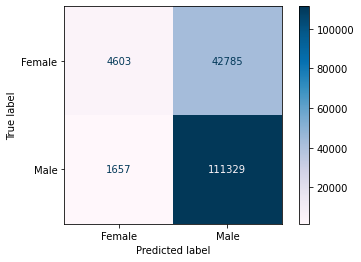

In [ ]:
# Import the libraries
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Plot confusion matrix for trained data
print("Confusion matrix for trained data")
plot_confusion_matrix(log_reg, X_train, y_train, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

Confusion matrix for test data


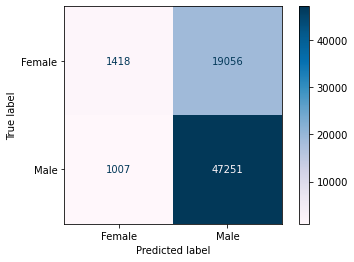

In [ ]:
# Plot confusion matrix for test data
print("Confusion matrix for test data")
plot_confusion_matrix(log_reg, X_test, y_test, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

In [ ]:
pd.Series(y_test).value_counts()

1    48258
0    20474
Name: Gender, dtype: int64

Out of 48258 males model predicts only 47251 labels correctly. Out of 20474 female model classifies only 1418 as female, the remaining as male.

To use classification report,
1. Import `classification_report` from `sklearn.metrics`
2. It needs 2 inputs. Provide actual target labels and predicted target labels 

**Precision, Recall and F1-score:**
In our dataset let us say prediction as Female is Positive outcome and prediction as male is Negative outcome.
From the confusion matrix we get the following values:

* **True Positive (TP)**: Actual class is Female, predicted class is also Female

* **False Positive (FP)**: Actual class is Male, predicted class is Female

* **True Negative (TN)**: Actual class is Male, predicted class is also Male

* **False Negative (FN)**: Actual class is Female, predicted class is Male

**Precision**: The ratio of correct positive predictions to the total predicted positives. This specifies when the model has predicted a positive outcome how often is it correct ?

$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

**Recall**: The ratio of correct positive predictions to the total positives examples. This represents out of the total positives, what percentage are actually predicted positive.

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

**F1-Score**: is the harmonic mean of Precision and Recall. f1-score eliminates bias between precision and recall by giving same weightage to both false positives and false negatives. 

$$\text{F1-score} = \frac{\text{2 * Precision * Recall}}{\text{(Precision + Recall)}}$$

All three values precision, recall and f1-score range between 0 to 1. The closer to 1 the better are the values. A f1-score of 1 means 100% prediction.

In [ ]:
print("Classification Report Train Data:\n", classification_report(y_train, y_pred_train))

print("\nClassification Report Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.74      0.10      0.17     47388
           1       0.72      0.99      0.83    112986

    accuracy                           0.72    160374
   macro avg       0.73      0.54      0.50    160374
weighted avg       0.73      0.72      0.64    160374


Classification Report Test Data:
               precision    recall  f1-score   support

           0       0.58      0.07      0.12     20474
           1       0.71      0.98      0.82     48258

    accuracy                           0.71     68732
   macro avg       0.65      0.52      0.47     68732
weighted avg       0.67      0.71      0.62     68732



Logistic regression model has an accuracy score of 0.71 on the test data. However model underperforms on class 0 as compared to class 1.

This is also because of the imbalance in the dataset. We may now try to resample the dataset and deploy the model for improving the performance. 

In [ ]:
# Find the percentage of 0s and 1s labels in y_train
(pd.Series(y_train).value_counts()/ len(pd.Series(y_train))) * 100

1    70.451569
0    29.548431
Name: Gender, dtype: float64

We can see 70% of the data used for fitting the model has label 1 (majority class) and only 30% has label 0 (minority class).



##Activity 9: Over Sampling and Under Sampling

**Over Smapling**

A balanced dataset can be synthesized using an oversampling technique called Synthetic Minority Over Sampling Technique (SMOTE) which aims to increase the number of samples in minority class to create a balanced dataset.

In [ ]:
# Import the libraries
from imblearn.over_sampling import SMOTE

# Create an instance of class SMOTE, set ratio = 1. This increases minority class count to match majority class count
smote = SMOTE(ratio = 1)

# Fit the sample for synthesizing
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) 

# Fit the logistic regression model again with resampled features and target variables.
log_reg_ores = LogisticRegression()
log_reg_ores.fit(X_train_res, y_train_res)
log_reg_ores.score(X_train_res, y_train_res)

# Make predictions on train and test dataset
y_pred_train = log_reg_ores.predict(X_train_res)
y_pred_test = log_reg_ores.predict(X_test)

In [ ]:
# Find the number of labels in y_train after resampling
pd.Series(y_train_res).value_counts()

1    112986
0    112986
dtype: int64

Confusion matrix for trained data


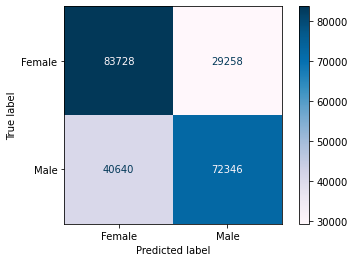

In [ ]:
# Plot confusion matrix for trained data
print("Confusion matrix for trained data")
plot_confusion_matrix(log_reg_ores, X_train_res, y_train_res, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

Confusion matrix for test data


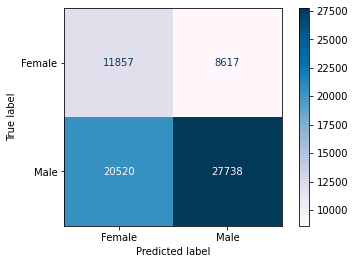

In [ ]:
# Plot confusion matrix for test data
print("Confusion matrix for test data")
plot_confusion_matrix(log_reg_ores, X_test, y_test, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

In [ ]:
print("Classification Report Train Data:\n", classification_report(y_train_res, y_pred_train))

Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.67      0.74      0.71    112986
           1       0.71      0.64      0.67    112986

    accuracy                           0.69    225972
   macro avg       0.69      0.69      0.69    225972
weighted avg       0.69      0.69      0.69    225972



In [ ]:
print("Classification Report Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report Test Data:
               precision    recall  f1-score   support

           0       0.37      0.58      0.45     20474
           1       0.76      0.57      0.66     48258

    accuracy                           0.58     68732
   macro avg       0.56      0.58      0.55     68732
weighted avg       0.64      0.58      0.59     68732



With SMOTE, precision and recall for label 0 has significantly increased, but there is considerable drop in f1-score.

**Under Sampling**

Lets us now try to reduce the count of majority class to minority class using RandomUnderSampler sampling strategy.

In [ ]:
# Value count before under sampling
pd.Series(y_train).value_counts()

1    112986
0     47388
Name: Gender, dtype: int64

In [ ]:
# Import the libraries
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of class RandomUnderSampler, set random_state = 0. 
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'majority')

# Fit the sample for synthesizing
X_train_ures, y_train_ures = rus.fit_resample(X_train, y_train)

# Fit the logistic regression model again with resampled features and target variables.
log_reg_ures = LogisticRegression()
log_reg_ures.fit(X_train_ures, y_train_ures)
log_reg_ures.score(X_train_ures, y_train_ures)


# Make predictions on train and test dataset
y_pred_train = log_reg_ures.predict(X_train_ures)
y_pred_test = log_reg_ures.predict(X_test)

In [ ]:
# Value count after under sampling
pd.Series(y_train_ures).value_counts()

1    47388
0    47388
dtype: int64

As it can be seen both the classes have 47388 samples. This is a balanced dataset.

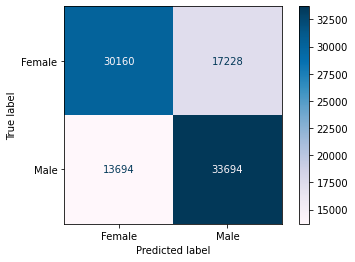

In [ ]:
# Plot confusion matrix for train data
plot_confusion_matrix(log_reg_ures, X_train_ures, y_train_ures, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

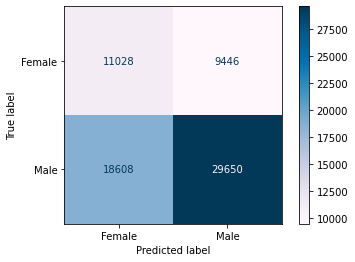

In [ ]:
# Plot confusion matrix for test data
plot_confusion_matrix(log_reg_ures, X_test, y_test, cmap = 'PuBu', display_labels = ['Female', 'Male'], values_format = 'g')
plt.grid(False)

In [ ]:
# Print classification report
print("Classification Report Train Data:\n", classification_report(y_train_ures, y_pred_train))

Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.69      0.64      0.66     47388
           1       0.66      0.71      0.69     47388

    accuracy                           0.67     94776
   macro avg       0.67      0.67      0.67     94776
weighted avg       0.67      0.67      0.67     94776



In [ ]:
print("Classification Report Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report Test Data:
               precision    recall  f1-score   support

           0       0.37      0.54      0.44     20474
           1       0.76      0.61      0.68     48258

    accuracy                           0.59     68732
   macro avg       0.57      0.58      0.56     68732
weighted avg       0.64      0.59      0.61     68732



Of the three models, upon under sampling logistic regression has an f1-score of 0.59 which isn't very bad considering the fact that its performing fairly descent on both the classes in contradiction to model with no sampling implemented. 

In this lesson a logistic regression classification model is deployed with and without sampling startegies which uses movie dialogues feature alone of the characters to predict the character gender. We may add other numerical featues like dialogue length, word count, character id frequency of occurence for a more robust model. 